# COGS 108 Final Project

Team Members: Thalal Cassim, Kevin Chen, Yongji Shen, Ansuman Somasundaram, Wei Zeng

## Grading Rubric For Ur Reference
https://github.com/COGS108/Projects/blob/master/FinalProj_Checklist.pdf

# Introduction and Background

# Data Description

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

# Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import patsy
import statsmodels.api as sm
%matplotlib inline

/Users/yongjishen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# read from data set
suicide = pd.read_csv("./datasets/suicide-rates-overview-1985-to-2016.csv")

### Data Cleaning & Pre-processing

First, we create four different dataframes accroding to sex, age, GDP and HDI, then we selecte some developed countries and some developing countries from out dataset and create other four different dataframes accroding to sex, age, GDP and HDI. <br>
(HDI stands for Human Development Index, the first year of country start to count HDI are different, so that we have to drop all the years which do not have HDI in order to anaysis this dataset)

In [5]:
#select data from those following countries from our data set
selected = ["Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa"]
tmp = list()   
for i in (suicide.index):
    for country in selected:
        if suicide.loc[i,"country"]==country:
            tmp.append(suicide.loc[i].tolist())
df = pd.DataFrame(columns = suicide.columns)
for i in tmp:
    df = df.append(pd.Series(i, index=suicide.columns), ignore_index=True)

In [6]:
# Cleaning the Nan data on table
suicideHDI = suicide.dropna()
dfHDI = df.dropna()

In [7]:
#sex,age,dgc,and hdi for all countries
suicide_sex = suicide[['country','year','sex','suicides_no','population']]
suicide_age = suicide[['country','year','age','suicides_no','population']]
suicide_gdp = suicide[['country','year','suicides_no','population','suicides/100k pop',' gdp_for_year ($) ','gdp_per_capita ($)']]
suicide_hdi = suicideHDI[['country','year','suicides_no','suicides/100k pop','population','HDI for year']]

In [8]:
#sex,age,dgc,and hdi for selected countries 
#("Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa")
df_sex = df[['country','year','age','sex','suicides_no','population']]
df_age = df[['country','year','age','suicides_no','population']]
df_gdp = df[['country','year','suicides_no','population','suicides/100k pop',' gdp_for_year ($) ','gdp_per_capita ($)']]
df_hdi = dfHDI[['country','year','suicides_no','suicides/100k pop','population','HDI for year']]

### Data Visualization

##### Seaborn Config

In [9]:
# Configure Seaborn
sns.set()
sns.set_context('talk')

# Set max number of displayed rows/columns
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

#### Sex vs Suicide Rates

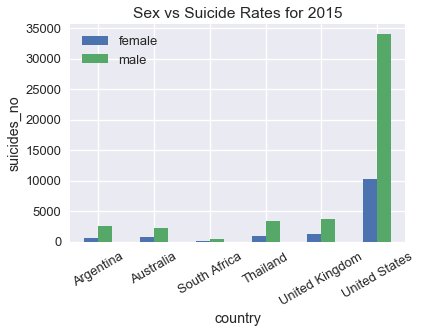

In [10]:
# Sex vs Suicide Rates in 2015
df_sex_2015 = df_sex[df_sex['year'] == 2015]
male = df_sex_2015[df_sex_2015['sex']=='male']
female = df_sex_2015[df_sex_2015['sex']=='female']

male_country = dict()
female_country = dict()
# Counting the amount of suicides for male and female
for i in male.index:
    for country in selected:
        if male.loc[i,"country"]==country:
            if country in male_country:
                male_country[country]+=male.loc[i,'suicides_no']
            else:
                male_country[country]=male.loc[i,'suicides_no']
for i in female.index:
    for country in selected:
        if female.loc[i,"country"]==country:
            if country in female_country:
                female_country[country]+=female.loc[i,'suicides_no']
            else:
                female_country[country]=female.loc[i,'suicides_no']

country = list()
male_count = list()
female_count = list()
for i in male_country:
    country.append(i)
    male_count.append(male_country[i])
    female_count.append(female_country[i])
    
# Create a new dataframe to store all above data
d = {'country': country, 'male': male_count,'female':female_count}
sex = pd.DataFrame(data=d)
sex.plot.bar(x = 'country',rot=30)
plt.ylabel("suicides_no")
plt.title("Sex vs Suicide Rates for 2015")
f1 = plt.gcf()

##### - Interpretation of Sex vs Suicide Rate for 2015
Sex vs Suicide Rate for 2015 shows that the amount of suicides of different grenders from our selected country in 2015. And this graph indicates the amount of male suicides is higher than the amount of female suicides

#### Sex + Age vs Suicide Rates

(0, 700)

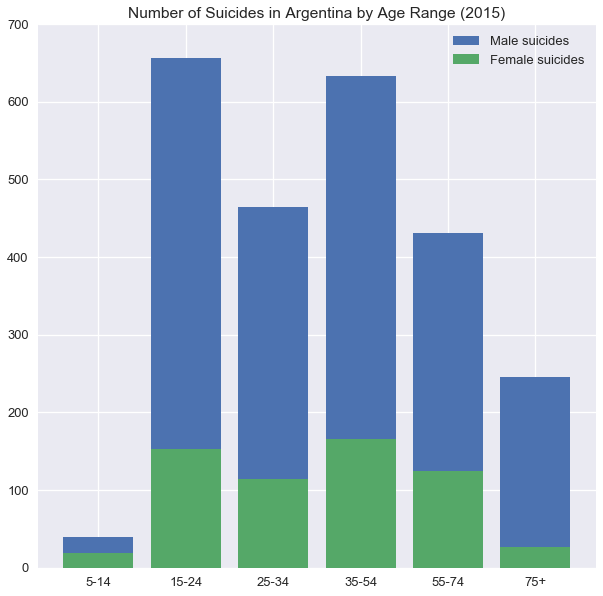

In [11]:
# Sex+Age vs Suicide Rates
# Age ranges: 5-14(range a), 15-24(range b), 25-34(range c), 35-54(range d), 55-74(range e), 75+(range f)

df_sex_2015 = df_sex[df_sex['year'] == 2015]
df_sex_argentina = df_sex_2015[df_sex_2015['country'] == 'Argentina']

count_male_a = 0
count_male_b = 0
count_male_c = 0
count_male_d = 0
count_male_e = 0
count_male_f = 0

#df_sex
df_male_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'male']

for index, row in df_male_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_male_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_male_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_male_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_male_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_male_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_male_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_male_a, "count 15-24:", count_male_b, "count 25-34:", count_male_c, "count 35-54:", count_male_d, "count 55_74:", count_male_e, "count 75+:", count_male_f)

m_count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_male_a, count_male_b, count_male_c, count_male_d, count_male_e, count_male_f]} 
m_counts = pd.DataFrame(m_count_dict)

count_female_a = 0
count_female_b = 0
count_female_c = 0
count_female_d = 0
count_female_e = 0
count_female_f = 0

#df_sex
df_female_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'female']

for index, row in df_female_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_female_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_female_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_female_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_female_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_female_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_female_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_female_a, "count 15-24:", count_female_b, "count 25-34:", count_female_c, "count 35-54:", count_female_d, "count 55_74:", count_female_e, "count 75+:", count_female_f)

fem_count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_female_a, count_female_b, count_female_c, count_female_d, count_female_e, count_female_f]} 
fem_counts = pd.DataFrame(fem_count_dict)
plt.figure(figsize = (10, 10))
plt.bar(m_counts.Group, height = m_counts.Count, label = 'Male suicides')
plt.bar(fem_counts.Group, height = fem_counts.Count, label = 'Female suicides')
plt.legend(loc = 'upper right')
plt.title("Number of Suicides in Argentina by Age Range (2015)")
plt.ylim(0, 700)

##### - Interpretation of Number of Suicides in Argentina by Age Range (2015)
Number of Suicides in Argentina by Age Range (2015) shows that the amount of suicides of different grenders based on their ages in Argentina in 2015. This graph indicates that the amount of male suicides is higher than the amount of female suicides and the Argentina people have a high suicide rate from 15 to 24.

#### GDP vs Suicide Rate

Text(0.5, 1.0, 'Log 10 transform of GDP in 2015')

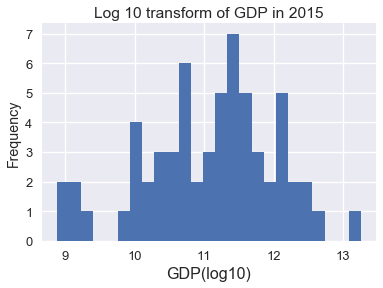

In [13]:
# GDP vs Suicide Rate in 2015
suicide_gdp = suicide_gdp[suicide_gdp.year == 2015]
tmp1 = suicide_gdp['country'].unique()
result1 = dict()
for i in tmp1:
    result1[i] = 0
result2 = dict()
for i in tmp1:
    result2[i] = 0
# count the amount of ratio and gdp in 2015 for different countries
for i in suicide_gdp.index:
    country = suicide_gdp.loc[i,"country"]
    ratio = suicide_gdp.loc[i,'suicides/100k pop']
    gdp = suicide_gdp.loc[i,' gdp_for_year ($) ']
    result1[country]+= ratio
    result2[country] = gdp
    
country=list()
ratiolist = list()
gdplist = list()
for i in tmp1:
    ratio = result1[i]
    gdp = result2[i]
    country.append(i)
    ratiolist.append(int(ratio))
    gdp = gdp.replace(',','')
    gdplist.append(math.log10(int(gdp)))
    
# Create a new dataframe to store all above data
data= dict()
data = {"country":country,"ratio":ratiolist,"gdp":gdplist}
df1 = pd.DataFrame(data)
df1=df1.set_index("country")
df1['gdp'].plot('hist', bins = 25)
plt.xlabel('GDP(log10)', fontsize=16)
f2 = plt.gcf()
plt.title("Log 10 transform of GDP in 2015")

#### - Interpretation of Log 10 transform of GDP in 2015
Log 10 transform of GDP in 2015 indicates the gdp is normalized.

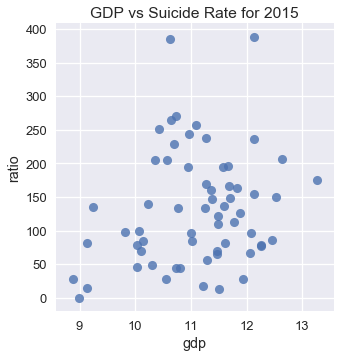

In [14]:
sns.lmplot(x='gdp', y='ratio', data=df1,fit_reg=False);
plt.title('GDP vs Suicide Rate for 2015')
f4 = plt.gcf()

#### - Interpretation of GDP vs Suicide Rate for 2015
GDP vs Suicide Rate for 2015 indicates the ratio of suicides/100k vs gdp

Text(0.5, 1.0, 'Log 10 transform of HDI in 2014')

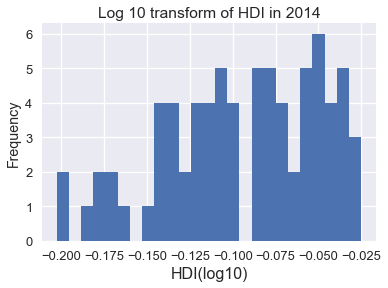

In [15]:
#HDI vs Suicide Rate for 2014
suicide_hdi = suicide_hdi[suicide_hdi.year == 2014]
#print(suicide_hdi)
tmp1 = suicide_hdi['country'].unique()
result3 = dict()
for i in tmp1:
    result3[i] = 0

result4 = dict()
for i in tmp1:
    result4[i] = 0
# count the amount of ratio and hdi in 2015 for different countries
for i in suicide_hdi.index:
    country = suicide_hdi.loc[i,"country"]
    ratio = suicide_hdi.loc[i,'suicides/100k pop']
    hdi = suicide_hdi.loc[i,'HDI for year']
    result3[country]+= ratio
    result4[country] = hdi
country=list()
ratiolist2 = list()
hdilist = list()

import math
for i in tmp1:
    ratio = result3[i]
    hdi = result4[i]
    country.append(i)
    ratiolist2.append(int(ratio))
    hdilist.append(math.log10(float(hdi)))
    
# Create a new dataframe to store all above data
data= dict()
data = {"country":country,"ratio":ratiolist2,"hdi":hdilist}
df2 = pd.DataFrame(data)
df2=df2.set_index("country")
df2['hdi'].plot('hist', bins = 25)
plt.xlabel('HDI(log10)', fontsize=16)
f3 = plt.gcf()
plt.title("Log 10 transform of HDI in 2014")

#### - Interpretation of Log 10 transform of HDI in 2014
Log 10 transform of HDI in 2014 indicates the hdi is normalized.

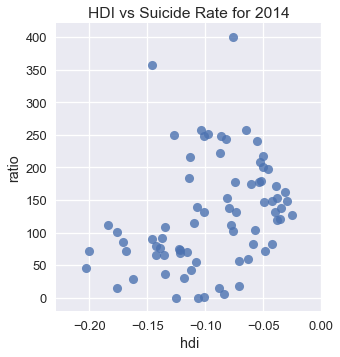

In [16]:
sns.lmplot(x='hdi', y='ratio', data=df2,fit_reg=False);
plt.title('HDI vs Suicide Rate for 2014')
f5 = plt.gcf()

#### - Interpretation of HDI vs Suicide Rate for 2014
HDI vs Suicide Rate for 2013 indicates the ratio of suicides/100k vs HDI

### Data Analysis & Results

#### Age vs Suicide

Text(0, 0.5, 'Suicide No.')

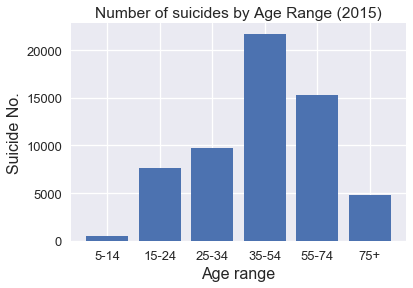

In [17]:
# Sex+Age vs Suicide Rates
# Age ranges: 5-14(range a), 15-24(range b), 25-34(range c), 35-54(range d), 55-74(range e), 75+(range f)

df_sex_2015 = df_sex[df_sex['year'] == 2015]

count_a = 0
count_b = 0
count_c = 0
count_d = 0
count_e = 0
count_f = 0

for index, row in df_sex_2015.iterrows():
    if(row['age'] == '75+ years'):
        count_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
# Create a new dataframe to store all above data       
count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_a, count_b, count_c, count_d, count_e, count_f]} 
counts = pd.DataFrame(count_dict)
plt.bar(counts.Group, height = counts.Count)
plt.title("Number of suicides by Age Range (2015)")
plt.xlabel("Age range", fontsize = 16)
plt.ylabel("Suicide No.", fontsize = 16)

#### Sex vs Suicide Rate

Recall that we have the chart of Sex vs Suicide Rate for 2015 back in the Data Visualization section.

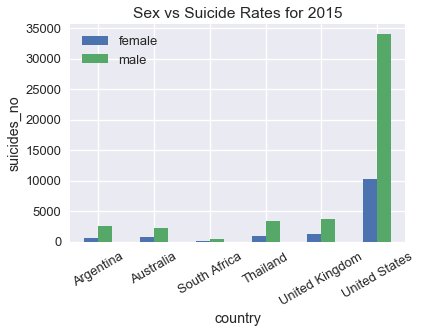

In [18]:
f1

#### OLS Regression Model For GDP vs Suicide Rate per 100K aka Ratio

In [19]:
outcome_1, predictors_1 = patsy.dmatrices('ratio ~ gdp', df1)
mod_1 = sm.OLS(outcome_1, predictors_1)
type(mod_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.173
Date:                Thu, 06 Jun 2019   Prob (F-statistic):             0.0799
Time:                        12:05:14   Log-Likelihood:                -361.65
No. Observations:                  62   AIC:                             727.3
Df Residuals:                      60   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -90.4529    125.705     -0.720      0.4

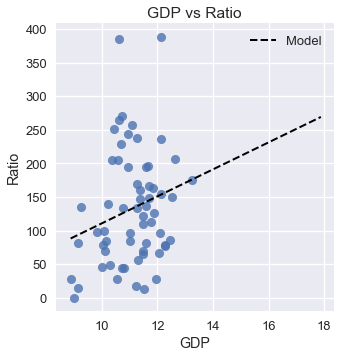

In [20]:
sns.lmplot(x='gdp', y='ratio', data=df1,fit_reg=False);
#the year max is increased by so our line goes out past existing data points
x = np.arange(df1['gdp'].min(), df1['gdp'].max()+5)

#This part is creating the graph
y = 20.1154 * x - 90.4529
plt.plot(x, y, '--k', linewidth=2, label='Model')
plt.title('GDP vs Ratio')
plt.xlabel('GDP')
plt.ylabel('Ratio')
plt.legend()

#### Important statistics & Analysis:
#### R-squared: 0.050,
    The r-squared is really close to 0%,  which indicates that the real data points are generally far away from our regression model prediction line. The prediction will highly likely to be unprecise.  
#### P > |t|: 0.080,
    The p value of the test end up to be 0.080 which is larger than the common alpha level 0.05. Therefore, we should drop gdp out of our discussion on suicide rate since the data did not end up to be statistically significant.

#### OLS Regression Model For HDI vs Suicide Rate per 100K aka Ratio

In [21]:
outcome_2, predictors_2 = patsy.dmatrices('ratio ~ hdi', df2)
mod_2 = sm.OLS(outcome_2, predictors_2)
type(mod_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     7.801
Date:                Thu, 06 Jun 2019   Prob (F-statistic):            0.00666
Time:                        12:05:15   Log-Likelihood:                -433.64
No. Observations:                  75   AIC:                             871.3
Df Residuals:                      73   BIC:                             875.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.4883     21.460      8.457      0.0

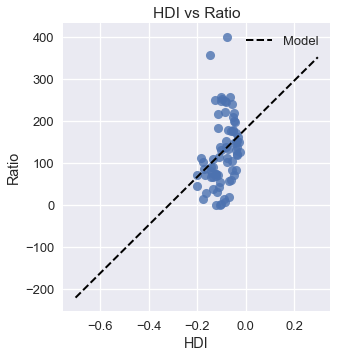

In [22]:
sns.lmplot(x='hdi', y='ratio', data=df2, fit_reg=False);
#the year max is increased by so our line goes out past existing data points
x = np.arange(df2['hdi'].min() - 0.5, df2['hdi'].max() + 0.5)

#This part is creating the graph
y = 572.7162 * x + 181.4883
plt.plot(x, y, '--k', linewidth=2, label='Model')
plt.title('HDI vs Ratio')
plt.xlabel('HDI')
plt.ylabel('Ratio')
plt.legend()

#### Important statistics & Analysis:
#### R-squared: 0.097,
    The r-squared is really close to 0%,  which indicates that the real data points are generally far away from our regression model prediction line. The prediction will highly likely to be unprecise.  
#### P > |t|: 0.007,
    which is smaller than the common alpha level 0.05. Therefore, we should keep HDI as a possible factor that might have an effect on the suicide rate.
    However, since the r-squared, again, is close to 0%, we will not get a precise prediction of the suicide rate from HDI with a ols model.

# Privacy & Ethnic Considerations

# Conclusion & Discussion